In [1]:
# Problem 0
def github() -> str:
    """
    Some docstrings.
    """
    
    return "https://github.com/<user>/<repo>/blob/main/<filename.py>"

In [21]:
#Problem 1
import pandas as pd

def load_data() -> pd.DataFrame:
    """
    Loads data on Tesla stock price history.
    """
    df = pd.read_csv('https://lukashager.netlify.app/econ-481/data/TSLA.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date',inplace=True)
    return df



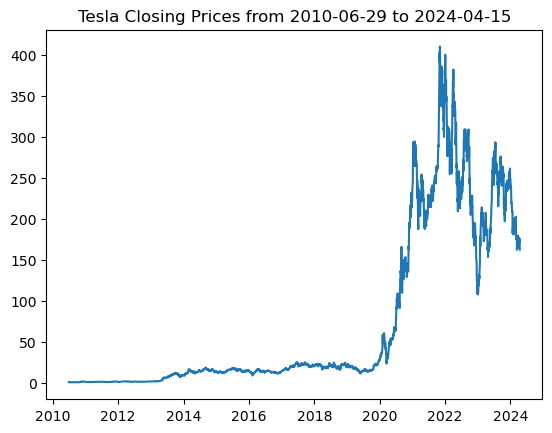

In [22]:
# Problem 2
import matplotlib.pyplot as plt
def plot_close(df: pd.DataFrame, start: str = '2010-06-29', end: str = '2024-04-15') -> None:
    """
    Plots the closing price of the stock from optional start to end dates
    """
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    sub_df = df.loc[start:end]
    plt.plot(sub_df['Close'])
    plt.title(f'Tesla Closing Prices from {start.date()} to {end.date()}')
    plt.show
plot_close(load_data())

In [11]:
# Problem 3 Scratch
import statsmodels.api as sm
import statsmodels.formula.api as smf
df = load_data()
print(df)
shifted_df = df.shift(freq = 'D')
sub3_df = df[df.index.isin(shifted_df.index)]
sub3_df['last_price'] = df['Close'].shift(1)
sub3_df['delta'] = sub3_df['Close'] - sub3_df['last_price']
print(sub3_df)
shift2 = sub3_df.shift(freq ='D')
newsub_df = sub3_df[sub3_df.index.isin(shift2.index)]
newsub_df['prev_delta'] = sub3_df['delta'].shift(1)
model = sm.OLS(newsub_df['delta'],newsub_df['prev_delta'])
results = model.fit(cov_type = 'HC1')
print(newsub_df)
# 4 scratch
newsub_df['positive'] = (newsub_df['delta']>0).astype(int)
logit = sm.Logit(newsub_df['positive'],newsub_df['prev_delta'])
#print(logit.fit(cov_type = 'HC1').summary())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-06-29    1.266667    1.666667    1.169333    1.592667    1.592667   
2010-06-30    1.719333    2.028000    1.553333    1.588667    1.588667   
2010-07-01    1.666667    1.728000    1.351333    1.464000    1.464000   
2010-07-02    1.533333    1.540000    1.247333    1.280000    1.280000   
2010-07-06    1.333333    1.333333    1.055333    1.074000    1.074000   
...                ...         ...         ...         ...         ...   
2024-04-09  172.910004  179.220001  171.919998  176.880005  176.880005   
2024-04-10  173.039993  174.929993  170.009995  171.759995  171.759995   
2024-04-11  172.550003  175.880005  168.509995  174.600006  174.600006   
2024-04-12  172.339996  173.809998  170.360001  171.050003  171.050003   
2024-04-15  170.248001  170.690002  162.322006  162.610001  162.610001   

               Volume  
Date         

/tmp/ipykernel_140/4248155798.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub3_df['last_price'] = df['Close'].shift(1)
/tmp/ipykernel_140/4248155798.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub3_df['delta'] = sub3_df['Close'] - sub3_df['last_price']
/tmp/ipykernel_140/4248155798.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [19]:
#Problem 3

def autoregress(df: pd.DataFrame) -> float:
    """
    Returns the t-stat of a linear regression on the movement of stocks on consecutive days.
    """
    shifted_df = df.shift(freq = 'D')
    sub3_df = df[df.index.isin(shifted_df.index)]
    #sub3_df contains only dates where we have data on the day before them
    sub3_df['last_price'] = df['Close'].shift(1)
    sub3_df['delta'] = sub3_df['Close'] - sub3_df['last_price']
    shift2 = sub3_df.shift(freq ='D')
    newsub_df = sub3_df[sub3_df.index.isin(shift2.index)]
    newsub_df['prev_delta'] = sub3_df['delta'].shift(1)
    model = sm.OLS(newsub_df['delta'],newsub_df['prev_delta'])
    results = model.fit(cov_type = 'HC1')
    return results.tvalues[0]
autoregress(load_data())

/tmp/ipykernel_140/4200039195.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub3_df['last_price'] = df['Close'].shift(1)
/tmp/ipykernel_140/4200039195.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub3_df['delta'] = sub3_df['Close'] - sub3_df['last_price']
/tmp/ipykernel_140/4200039195.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

0.418441199189008

In [20]:
#Problem 4
def autoregress_logit(df: pd.DataFrame) -> float:
    """
    Fits a logit model regressing the current delta on yesterday's delta and returns the t-statistic
    """
    shifted_df = df.shift(freq = 'D')
    sub3_df = df[df.index.isin(shifted_df.index)]
    #sub3_df contains only dates where we have data on the day before them
    sub3_df['last_price'] = df['Close'].shift(1)
    sub3_df['delta'] = sub3_df['Close'] - sub3_df['last_price']
    shift2 = sub3_df.shift(freq ='D')
    newsub_df = sub3_df[sub3_df.index.isin(shift2.index)]
    newsub_df['prev_delta'] = sub3_df['delta'].shift(1)
    newsub_df['positive'] = (newsub_df['delta']>0).astype(int)
    logit = sm.Logit(newsub_df['positive'],newsub_df['prev_delta'])
    results = logit.fit()
    
    return results.tvalues[0]
autoregress_logit(load_data())

Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2


/tmp/ipykernel_140/1605549092.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub3_df['last_price'] = df['Close'].shift(1)
/tmp/ipykernel_140/1605549092.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub3_df['delta'] = sub3_df['Close'] - sub3_df['last_price']
/tmp/ipykernel_140/1605549092.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

-0.040243565316327466

/tmp/ipykernel_140/497641685.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub3_df['last_price'] = df['Close'].shift(1)
/tmp/ipykernel_140/497641685.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub3_df['delta'] = sub3_df['Close'] - sub3_df['last_price']


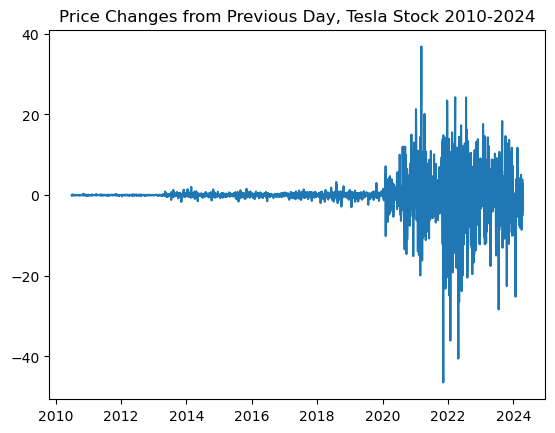

In [10]:
# Problem 5
def plot_delta(df: pd.DataFrame) -> None:
    """
    Plots the delta x's for the full dataset.
    """
    shifted_df = df.shift(freq = 'D')
    sub3_df = df[df.index.isin(shifted_df.index)]
    #sub3_df contains only dates where we have data on the day before them
    sub3_df['last_price'] = df['Close'].shift(1)
    sub3_df['delta'] = sub3_df['Close'] - sub3_df['last_price']
    plt.plot(sub3_df['delta'])
    plt.title('Price Changes from Previous Day, Tesla Stock 2010-2024')
plot_delta(load_data())